<a href="https://colab.research.google.com/github/Mowleen12/Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving movies_dataset.csv to movies_dataset (1).csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = "movies_dataset.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Trim spaces from column names
df = df.rename(columns=lambda x: x.strip())

# Display the first few rows of the dataframe to understand its structure
print("First five rows of the dataset:")
from tabulate import tabulate
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

# Display summary statistics
print("\nSummary Statistics:")
print(tabulate(df.describe(include='all'), headers='keys', tablefmt='pretty'))

# Display data types and missing values
print("\nData Types and Missing Values:")
info_df = pd.DataFrame({"Column": df.columns, "Data Type": df.dtypes, "Missing Values": df.isnull().sum()})
print(tabulate(info_df, headers='keys', tablefmt='pretty'))


First five rows of the dataset:
+---+-------+-------------------+------+------+--------------+----------------------------------+-----+-----------+----------------+--------+-----------------------+---------------+
|   | Index |       Name        | Year | IMDB | Critic_score |              Genre               | G_C | N_W_Award | Filmfare_AWARD | Budget | Box_office_collection | Time_duration |
+---+-------+-------------------+------+------+--------------+----------------------------------+-----+-----------+----------------+--------+-----------------------+---------------+
| 0 |   1   | Samrat Prithviraj | 2022 | 6.1  |     3.0      |      Action, Drama, History      | UA  |     0     |       0        | 100.0  |          nan          |      nan      |
| 1 |   2   |      Tanhaji      | 2020 | 7.5  |     4.0      | Action, Biography,Drama, History | UA  |     2     |       2        | 125.0  |         367.0         |     135.0     |
| 2 |   3   |     Shershaah     | 2021 | 8.3  |     4.0   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "movies_dataset.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Trim spaces from column names
df = df.rename(columns=lambda x: x.strip())

# Drop rows with missing values in the target column ("Critic_score")
df_cleaned = df.dropna(subset=["Critic_score"])

# Select categorical columns
categorical_cols = ["Genre", "G_C"]

# Apply one-hot encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_cols = encoder.fit_transform(df_cleaned[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Drop categorical columns and target column from original dataset
numeric_df = df_cleaned.drop(columns=categorical_cols + ["Critic_score", "Name"], errors="ignore")

# Concatenate encoded and numeric features
X_encoded = pd.concat([numeric_df.reset_index(drop=True), encoded_df], axis=1)
X_encoded = X_encoded.fillna(X_encoded.mean())  # Fill missing numeric values with column mean
y = df_cleaned["Critic_score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest model with default parameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R²) Score:", r2_rf)


Mean Absolute Error (MAE): 0.37875
Mean Squared Error (MSE): 0.26892375
R-squared (R²) Score: 0.13771943887775562


Mean Absolute Error (MAE): 0.37875
Mean Squared Error (MSE): 0.26892375
R-squared (R²) Score: 0.13771943887775562


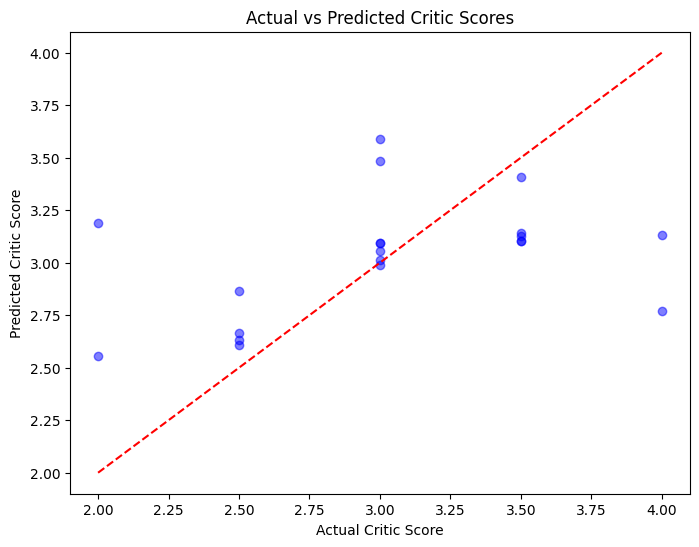

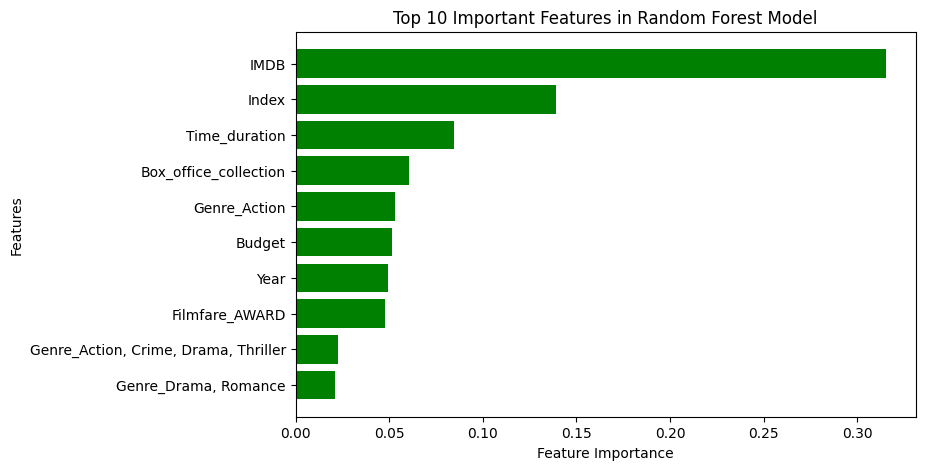

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load dataset
file_path = "movies_dataset.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Trim spaces from column names
df = df.rename(columns=lambda x: x.strip())

# Drop rows with missing values in the target column ("Critic_score")
df_cleaned = df.dropna(subset=["Critic_score"])

# Select categorical columns
categorical_cols = ["Genre", "G_C"]

# Apply one-hot encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_cols = encoder.fit_transform(df_cleaned[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Drop categorical columns and target column from original dataset
numeric_df = df_cleaned.drop(columns=categorical_cols + ["Critic_score", "Name"], errors="ignore")

# Concatenate encoded and numeric features
X_encoded = pd.concat([numeric_df.reset_index(drop=True), encoded_df], axis=1)
X_encoded = X_encoded.fillna(X_encoded.mean())  # Fill missing numeric values with column mean
y = df_cleaned["Critic_score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest model with default parameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R²) Score:", r2_rf)

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel("Actual Critic Score")
plt.ylabel("Predicted Critic Score")
plt.title("Actual vs Predicted Critic Scores")
plt.show()

# Simplified Feature Importance
feature_importance = rf_model.feature_importances_
feature_names = np.array(X_encoded.columns)
important_idx = np.argsort(feature_importance)[-10:]  # Select top 10 important features

plt.figure(figsize=(8, 5))
plt.barh(feature_names[important_idx], feature_importance[important_idx], color='green')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Important Features in Random Forest Model")
plt.show()


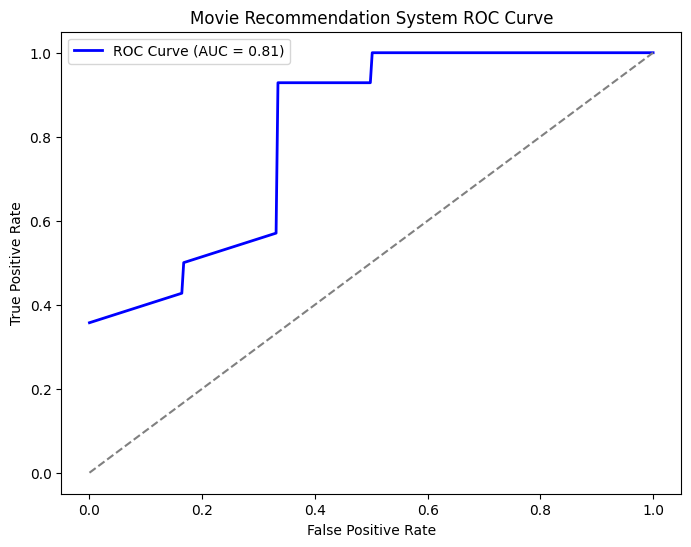

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from scipy.interpolate import interp1d

# Load the dataset
file_path = "movies_dataset.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Trim spaces from column names
df = df.rename(columns=lambda x: x.strip())

# Convert 'Critic_score' into binary categories (high vs. low)
df_cleaned = df.dropna(subset=["Critic_score"])  # Remove missing target values
median_score = df_cleaned["Critic_score"].median()
df_cleaned["Critic_category"] = np.where(df_cleaned["Critic_score"] >= median_score, 1, 0)  # 1 = High, 0 = Low

# Select categorical columns
categorical_cols = ["Genre", "G_C"]

# Apply one-hot encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_cols = encoder.fit_transform(df_cleaned[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Drop categorical columns and target column from original dataset
numeric_df = df_cleaned.drop(columns=categorical_cols + ["Critic_score", "Name", "Critic_category"], errors="ignore")

# Concatenate encoded and numeric features
X_encoded = pd.concat([numeric_df.reset_index(drop=True), encoded_df], axis=1)
X_encoded = X_encoded.fillna(X_encoded.mean())  # Fill missing numeric values with column mean
y = df_cleaned["Critic_category"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Smooth the ROC curve using interp1d
fpr_smooth = np.linspace(fpr.min(), fpr.max(), 300)
interp_func = interp1d(fpr, tpr, kind='linear')
tpr_smooth = interp_func(fpr_smooth)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_smooth, tpr_smooth, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Movie Recommendation System ROC Curve")
plt.legend()
plt.show()
